#Лабораторная работа №1
ПРИБЛИЖЕННЫЕ МЕТОДЫ РЕШЕНИЯ НЕЛИНЕЙНЫХ СКАЛЯРНЫХ УРАВНЕНИЙ


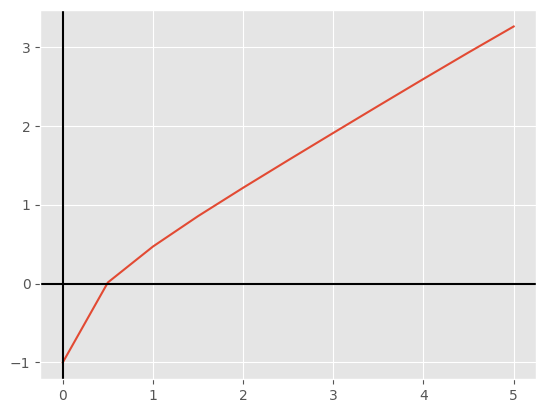

In [29]:
import numpy as np
import matplotlib.pyplot as plt

a = 0
b = 5
n = 10
h = (b - a)/n;
x = np.arange(a, b+h, h)
y = np.sqrt(2*x) - np.cos(x/3)

plt.plot(x, y)
plt.grid(True)

ax = plt.gca()

# plot X - axis
ax.axhline(y=0, color='k')

# plot Y - axis
ax.axvline(x=0, color='k')
plt.show()


In [30]:
x_printed = x

for coor in x_printed:
  print(coor)

0.0
0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
